# About The Dataset

The dataset contains a variety of features that represent properties of the cell nucleus. The mean, standard error, and largest values for each of these attributes are calculated and categorized.

- **id**
- **diagnosis**: M = malignant, B = benign

Columns 3 to 32 contain ten real-valued features for each cell nucleus:

- **radius**: distance from the center to points on the perimeter
- **texture**: standard deviation of gray-scale values
- **perimeter**
- **area**
- **smoothness**: local variation in radius lengths
- **compactness**: perimeter^2 / area - 1.0
- **concavity**: severity of concave portions of the contour
- **concave points**: number of concave portions of the contour
- **symmetry**
- **fractal dimension**: "coastline approximation" - 1

In [2]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

# Adjusting Visual Styles
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.3)


Reading the data from the csv file and printing the first 5 rows

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Last column **Unnamed: 32** appears to have many missing values. We will also check other columns for missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

With the exception of the **Unnamed: 32** column, which is filled with missing values, it looks that our dataset is free of missing values. Now let's remove this specific column totally. After that, we'll examine each column's data type.


In [5]:
df = df.drop('Unnamed: 32', axis=1)

Confirming all the data types

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

There are two classes for the variable "diagnosis": "B" for benign and "M" for malignant. Since they are numerical, other variables don't require type conversion. First, let's look at the 'diagnostic' class distribution.

In [17]:
# Visualizing class distribution
class_counts = df['diagnosis'].value_counts()

# Creating a pie chart using Plotly
fig = px.pie(
    class_counts,
    values=class_counts.values,
    names=class_counts.index,
    labels=class_counts.index,
    title='Distribution of Diagnosis',
    color=class_counts.index,  # Assign colors to different classes
    color_discrete_map={'Benign': '#FF9999', 'Malignant': '#66B2FF'},
)

# Making th layout look better
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])  # Pull first slice slightly
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),
    legend=dict(title='Diagnosis', orientation='h', y=1, yanchor='bottom', x=0.5, xanchor='center'),
)

# showing the interactive plot
fig.show()

# Counting observations in each class
benign_count, malignant_count = df['diagnosis'].value_counts()
print('Count of cells labeled as Benign: ', benign_count)
print('Count of cells labeled as Malignant: ', malignant_count)
print('')
print('Percentage of cells labeled Benign: ', round(benign_count / len(df) * 100, 2), '%')
print('Percentage of cells labeled Malignant: ', round(malignant_count / len(df) * 100, 2), '%')

Count of cells labeled as Benign:  357
Count of cells labeled as Malignant:  212

Percentage of cells labeled Benign:  62.74 %
Percentage of cells labeled Malignant:  37.26 %


Out of 569 entries, 357 (62.7%) are malignant while 212 (37.3%) are benign. We expect a similar label distribution for new data. 

We will now clean the data for further processing

In [8]:
# Drop columns associated with "worst" attributes
worst_cols = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
              'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
              'fractal_dimension_worst']
df = df.drop(worst_cols, axis=1)

# Remove columns linked to "perimeter" and "area" attributes
perimeter_area_cols = ['perimeter_mean', 'perimeter_se', 'area_mean', 'area_se']
df = df.drop(perimeter_area_cols, axis=1)

# Eliminate columns related to "concavity" and "concave points" attributes
concavity_cols = ['concavity_mean', 'concavity_se', 'concave points_mean', 'concave points_se']
df = df.drop(concavity_cols, axis=1)



Now, we will confirm what all columns are left

In [9]:
df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

# Building the Model
We will first split the dataset into train and testing split (70-30 distribution respectively)

In [10]:
X = df
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Now that we have split our data into appropriate sets, let's write down the formula to be used for the `logistic regression`.

In [11]:
# Create a string for the formula
cols = df.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the `logistic regression` with this formula and take a look at the results.

In [12]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -55.340
Date:                              Fri, 22 Dec 2023   Deviance:                       110.68
Time:                                      20:22:33   Pearson chi2:                     125.
No. Iterations:                                   9   Pseudo R-squ. (CS):             0.6539
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

Great! In the next section, we will feed in the test data to this model to yield predictions of labels. Then, we will evaluate how accurately the model have predicted the data. 

# Predicting
___
we developed a logistic regression model that assigns probabilities between 0 and 1 to unlabeled data. To evaluate its accuracy, we need to convert these probabilities to class labels. We'll use a threshold of 0.5: if the probability is closer to 0, we'll label it as "M" (Malignant), and if it's closer to 1, we'll label it as "B" (Benign).

In [13]:
# predict the test data and show the first 10 predictions
predictions = logistic_fit.predict(X_test)
predictions[:10]

id
891923      0.997187
848406      0.324251
907915      0.996906
911201      0.964710
84799002    0.000544
8911164     0.838719
9113156     0.609435
863031      0.967341
8711216     0.053005
865137      0.999907
dtype: float64

The values are numerical, we will need to convert them into categorical

In [14]:

predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_nominal[:10]

['B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B']

We can confirm that probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". Now we are able to evaluate the accuracy of our predictions by checking out the classification report and the confusion matrix.

In [15]:
# Display classification report
print(classification_report(y_test, predictions_nominal, digits=3))

# Calculate and display the confusion matrix
cfm = confusion_matrix(y_test, predictions_nominal)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('Confusion Matrix: \n', cfm, '\n')

# Display the count of true negatives, false positives, false negatives, and true positives
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)

# Display the percentage of correct predictions
print('Correct Predictions:', round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')

              precision    recall  f1-score   support

           B      0.982     0.965     0.974       115
           M      0.931     0.964     0.947        56

    accuracy                          0.965       171
   macro avg      0.957     0.965     0.961       171
weighted avg      0.966     0.965     0.965       171

Confusion Matrix: 
 [[111   4]
 [  2  54]] 

True Negative: 111
False Positive: 4
False Negative: 2
True Positive: 54
Correct Predictions: 96.5 %


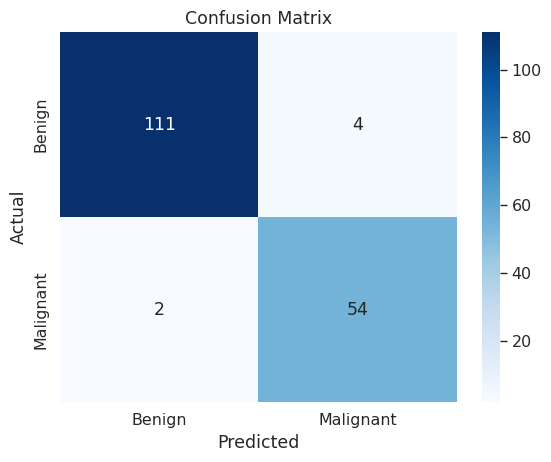

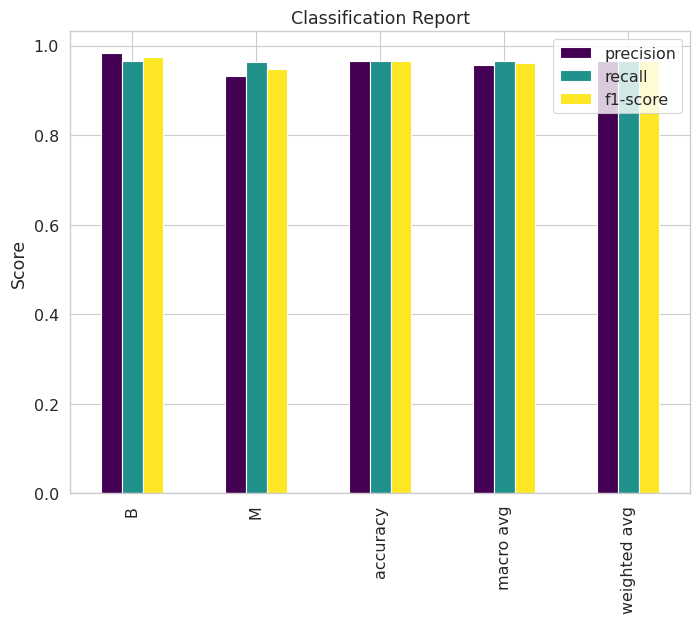

In [16]:
# Plotting Confusion Matrix as a heatmap
labels = ['Benign', 'Malignant']
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting a bar chart for the classification report
report_dict = classification_report(y_test, predictions_nominal, digits=3, output_dict=True)
report_df = pd.DataFrame(report_dict).T
report_df = report_df.drop(['support'], axis=1)
report_df.plot(kind='bar', colormap='viridis', figsize=(8, 6))
plt.title('Classification Report')
plt.ylabel('Score')
plt.show()